In [90]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
np.random.seed(0)
from treePlotter import createPlot
import matplotlib.pyplot as plt
%matplotlib inline
import gc
gc.collect()

8539

In [91]:
# p202 西瓜数据集4.0
X=np.array([[0.697,0.460],[0.774,0.376],[0.634,0.264],[0.608,0.318],[0.556,0.215],
                [0.403,0.237],[0.481,0.149],[0.437,0.211],[0.666,0.091],[0.243,0.267],
                [0.245,0.057],[0.343,0.099],[0.639,0.161],[0.657,0.198],[0.360,0.370],
                [0.593,0.042],[0.719,0.103],[0.359,0.188],[0.339,0.241],[0.282,0.257],
                [0.748,0.232],[0.714,0.346],[0.483,0.312],[0.478,0.437],[0.525,0.369],
                [0.751,0.489],[0.532,0.472],[0.473,0.376],[0.725,0.445],[0.446,0.459]])

In [116]:
class Kmeans:
    def __init__(self, k, maxIter):
        self.k = k 
        self.maxIter = maxIter #最大更新次数
        
    def fit(self, X):
        
        #图9.24
        n_samples = X.shape[0]
        init_index = [int(np.random.random() * n_samples) for _ in range(self.k)]
        u = [X[index] for index in init_index] #初始化均值向量    line1
        
        for _ in range(self.maxIter):   #line 3
            C = {}
            for c in range(self.k):
                C[c] = []
                
            for j in range(n_samples):   #line 4-7
                dji_max = -1
                lambdaj = None
                for u_ in range(len(u)):
                    dji = np.sqrt(np.sum(np.square(X[j] - u[u_])))   #
                    if dji > dji_max:
                        dji_max = dji
                        lambdaj = u_

                C[lambdaj].append(j) # line 7  #直接append 不需要再赋值，不然是None
            
            finish = True
            for i in range(self.k): # line 9-16
                u_new = (np.sum(X[C[i]], axis=0)+u[i] ) / (len(C[i]) + 1)#按列求均值 
                if (np.sum(u_new) - np.sum(u[i]))**2 > (1e-2)**2:  #由于计算精度等问题，采用这样比较两向量是否一致
                    finish = False
                    u[i] = u_new
                
            if finish:
                break

        return C
                
                            
kmeans = Kmeans(k=3, maxIter=100)
C = kmeans.fit(X)

In [117]:
C

{0: [5, 6, 7, 9, 10, 11, 15, 17, 18, 19],
 1: [0, 1, 2, 3, 4, 8, 12, 13, 16, 20, 21, 25, 28],
 2: [14, 22, 23, 24, 26, 27, 29]}

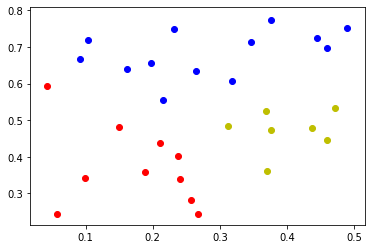

In [118]:
colors = ['r', 'b', 'y']
for i in range(len(C)):
    for j in C[i]:
        plt.scatter(X[j][1], X[j][0], c=colors[i])
    